# MOVIE RECOMMENDATION SYSTEM
Here we are going to use Netflix prize data for building a movie recommendation system.

* I am going to build a movie recommendation system using collaborative filtering technique. There are many methods in collaborative filtering, here I am using Model based method using singular value decomposition.
* Netflix prize data set is used for building this.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from surprise import Reader, Dataset, SVD

In [8]:
def loadFile(file,r=10000000):
    c=0
    movId,custId,rating,date=[],[],[],[]
    fp=open(file,'r')
    lines=fp.read()
    lst=lines.splitlines()
    for line in lst:
        c+=1
        if ':' in line:
            l=line.split(':')
            movid=int(l[0])
        else:
            l=line.split(',')
            movId.append(movid)
            custId.append(int(l[0]))
            rating.append(int(l[1]))
            date.append(l[2])
        if c==r:
            break
    d={'movId':movId,'custId':custId,'rating':rating,'date':date}
    fp.close()
    return d

In [9]:
df=[]
for file in ['combined_data_1.txt','combined_data_2.txt',
             'combined_data_3.txt','combined_data_3.txt','combined_data_4.txt']:
    df.append(loadFile(file))

In [10]:
df1=pd.DataFrame(df[0])
df2=pd.DataFrame(df[1])
df3=pd.DataFrame(df[2])
df4=pd.DataFrame(df[3])


In [11]:
df1.movId.nunique(),df2.movId.nunique(),df3.movId.nunique(),df4.movId.nunique()

(1962, 1635, 1942, 1942)

In [12]:
tot_mov,tot_cust=0,0
for dfr in [df1,df2,df3,df4]:
    nmov=dfr['movId'].nunique()
    ncust=dfr['custId'].nunique()
    tot_mov+=nmov
    tot_cust+=ncust
tot_mov,tot_cust

(7481, 1824304)

In [13]:
df1.shape

(9998038, 4)

In [14]:
df2.shape

(9998365, 4)

In [15]:
df1.head()

,movId,custId,rating,date
0,1,1488844,3,2005-09-06
1,1,822109,5,2005-05-13
2,1,885013,4,2005-10-19
3,1,30878,4,2005-12-26
4,1,823519,3,2004-05-03


In [16]:
df=df1.copy()
df.append(df2)
df.append(df3)
df.append(df4)

,movId,custId,rating,date
0,1,1488844,3,2005-09-06
1,1,822109,5,2005-05-13
2,1,885013,4,2005-10-19
3,1,30878,4,2005-12-26
4,1,823519,3,2004-05-03
...,...,...,...,...
9998053,11152,1389634,3,2004-04-30
9998054,11152,2033589,3,2004-04-21
9998055,11152,1041125,5,2004-04-20
9998056,11152,729393,4,2004-03-24


In [17]:
mov_title=pd.read_csv('movie_titles.csv',header=None,
                      names=['movId','year','name'],encoding = "ISO-8859-1")

In [18]:
mov_title.head()

,movId,year,name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


In [19]:
mov_title['movId'].nunique()

17770

In [20]:
uni_mov1=list(df1['movId'].unique())
uni_mov2=list(df2['movId'].unique())
uni_mov3=list(df3['movId'].unique())
uni_mov4=list(df4['movId'].unique())

In [21]:
len(uni_mov1),len(uni_mov2),len(uni_mov3),len(uni_mov3)

(1962, 1635, 1942, 1942)

In [22]:
uni_mov=uni_mov1
uni_mov.extend(uni_mov2)
uni_mov.extend(uni_mov3)
uni_mov.extend(uni_mov4)

In [23]:
len(uni_mov)

7481

(array([ 442214.,       0.,  974633.,       0.,       0., 2842781.,
              0., 3445626.,       0., 2292784.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

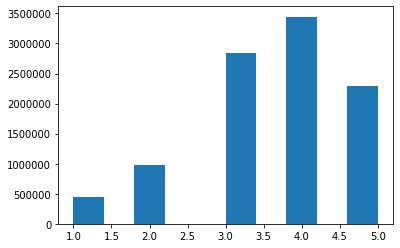

In [25]:
plt.hist(df.rating)

In [26]:
df.isnull().sum()  #Checking For Null values

movId     0
custId    0
rating    0
date      0
dtype: int64

In [27]:
read= Reader()  # To parse the file we have to create a Reader object

In [28]:
data=Dataset.load_from_df(df[['movId','custId','rating']],read)

In [29]:
svd=SVD()  # Creating an SVD class object

In [30]:
from surprise.model_selection import train_test_split

In [33]:
train,test_s=train_test_split(data,test_size=0.3)  # splitting the data into training and testing.

In [32]:
svd.fit(train)  # Training the model on training data

In [34]:
preds=svd.test(test_s)

In [37]:
from surprise import accuracy
accuracy.rmse(preds)            # Evaluating the model's performance using RMSE metric.

RMSE: 0.7955


0.7955436071677765

In [39]:
from surprise.model_selection import KFold

In [41]:
svd_=SVD()

In [42]:
#Checking Cross-validation results using 3- fold cross validation.
kf=KFold(n_splits=3)    
for trainset, testset in kf.split(data):

    # train and test algorithm.
    svd_.fit(trainset)
    predictions = svd_.test(testset)

    # Compute and print Root Mean Squared Error
    accuracy.rmse(predictions, verbose=True)

RMSE: 0.9250
RMSE: 0.9248
RMSE: 0.9246


In [43]:
# as we got good values for the RMSE metric we are going to train on entire data set.
trainset = data.build_full_trainset()
svd.fit(trainset)

In [70]:
mov_titles = mov_title.copy()


In [71]:
# Predicting movies that can be recommended for a customer with customer ID 822109
mov_titles['rating_prd_822109'] = mov_titles['movId'].apply(lambda x: svd.predict(822109, x).est)

In [72]:
# Listing out the top 10 recommendations for this customer.
mov_titles = mov_titles.sort_values(by=['rating_prd_822109'], ascending=False)
mov_titles.head(10)

,movId,year,name,rating_prd_822109
6735,6736,2005.0,Robots,4.954274
3997,3998,1988.0,Joseph Campbell and The Power of Myth,4.695395
133,134,1996.0,Spirit Lost,4.677680
4678,4679,1965.0,Battle of the Bulge,4.674336
10900,10901,2004.0,The Keeper of Time,4.657646
17450,17451,2000.0,Along for the Ride,4.624653
12630,12631,2002.0,The Ultimate Beginner Series: Rock Guitar Styles,4.604865
13510,13511,1993.0,Much Ado About Nothing,4.603761
14059,14060,2004.0,Alexander: Theatrical Cut,4.600869
8814,8815,1992.0,Chaplin: The Movie,4.596318


In [73]:
df[df['custId']==822109]

,movId,custId,rating,date
1,1,822109,5,2005-05-13
3014052,571,822109,5,2005-04-25
3216157,607,822109,5,2005-04-07
4855982,985,822109,5,2005-04-25
5645341,1144,822109,5,2005-05-21
5725461,1145,822109,3,2005-04-07
6108601,1202,822109,3,2005-04-07
6204109,1220,822109,5,2005-04-25
6631370,1307,822109,3,2005-04-25
6971192,1406,822109,3,2005-04-07


In [74]:
#Checking the predicted rating for the movie with iD 1905 by customer with ID 822109.
svd.predict(1905,822109,5)

Prediction(uid=1905, iid=822109, r_ui=5, est=4.546096129439273, details={'was_impossible': False})

In [75]:
svd.predict(1605,822109,3)

Prediction(uid=1605, iid=822109, r_ui=3, est=3.023424195441081, details={'was_impossible': False})

So, here in this notebook I have developed a simple recommendation system for movies using collaborative filtering technique.